In [60]:
# УДОБНЫЕ КЛАССЫ И ФУНКЦИИ ДЛЯ УПРОЩЕНИЯ РАСЧЕТОВ
from functools import total_ordering


@total_ordering
class Point:
    """Класс точки функции и ее значения для более удобных манипуляций"""

    def __init__(self, point, value):
        self.point = point
        self.value = value

    def __eq__(self, other):
        return self.value == other.value

    def __le__(self, other):
            return self.value <= other.value

# Задание 1

Написать в среде MATLAB функции, реализующие метод перебора, метод поразрядного поиска, метод дихотомии, метод золотого сечения, метод парабол, метод средней точки, метод хорд и метод Ньютона.

In [61]:
# МЕТОД ПЕРЕБОРА

from math import ceil

def iterate_method(func, a, b, eps):
    """Реализация метода перебора. Возвращает точку минимума, значение минимума функции и количество вычислений"""

    segments_number = ceil((b - a)/eps)

    func_results = []
    for point_num in range(segments_number+1):
        func_point = a + point_num*(b-a)/segments_number
        func_results.append(
            (func_point, func(func_point))
        )

    return *min(func_results, key=lambda x: x[1]), segments_number

In [62]:
# МЕТОД ПОРАЗРЯДНОГО ПОИСКА

def bitByBitSearch(func, a, b, eps):
    """Реализация метода поразрядного поиска. Возвращает точку минимума, значение минимума функции и количество вычислений"""

    cur_eps = 0.25 if 0.25 > eps else eps
    left_bound, right_bound = a, b

    direction_to_right = True
    compute_number = 0
    
    min_point = Point(0, float('inf'))
    
    while True:
        segments_number = ceil((right_bound - left_bound)/cur_eps)

        cur_range = range(segments_number+1) if direction_to_right else range(segments_number, -1, -1)

        for point_num in cur_range:
            
            func_arg = left_bound + point_num*(right_bound - left_bound)/segments_number
            compute_number += 1
            
            func_value = func(func_arg)
            func_point = Point(func_arg, func_value)
            
            if func_point >= min_point:
                break
            else:
                min_point = func_point

        if cur_eps <= eps:
            break
        else:
            direction_to_right = not direction_to_right
            cur_eps /= 4

    return min_point.point, min_point.value, compute_number
                


In [63]:
def dichotomy_minimize(func, a, b, eps):
    
    # Маленькая величина для смещения относительно середины отрезка
    delta = eps / 2

    compute_number = 0
    
    while (b - a)/2 > eps:

        x1, x2 = (a + b - delta) / 2, (a + b + delta) / 2
        compute_number += 1
        
        if func(x1) < func(x2):
            # Минимум находится в левом подотрезке
            b = x2
        else:
            # Минимум находится в правом подотрезке
            a = x1

    minim_value = (a + b) / 2
    final_res = func(minim_value)
    
    # Возвращаем середину финального отрезка как приближение минимума
    return minim_value, final_res, compute_number

In [64]:
from math import sqrt

def golden_section(func, a, b, eps):

    sqrt_5 = sqrt(5)
    tau = (sqrt_5 - 1) / 2
    compute_number = 0
    
    x1, x2 = a + ((3 - sqrt_5) / 2) * (b - a), a + ((sqrt_5 - 1) / 2) * (b - a)
    f1, f2 = func(x1), func(x2)
    compute_number += 2
    eps_n = (b - a) / 2

    while eps_n <= eps:
        if f1 <= f2:
            b = x2
            x2 = x1
            f2 = f1
            x1 = b - tau*(b - a)
            f1 = func(x1)
        else:
            a = x1
            x1 = x2
            f1 = f2
            x2 = b - tau*(b - a)
            f2 = func(x2)
            
        compute_number += 1

    minim_value = (a + b) / 2
    final_res = func(minim_value)

    return minim_value, final_res, compute_number

In [99]:
def golden_submethod(func, a, b) -> tuple[int, int, int, int]:
    """Подметод для метода парабл, который ищет подходящие 3 точки"""

    sqrt_5 = sqrt(5)
    tau = (sqrt_5 - 1) / 2
    compute_number = 0
    
    x1, x2 = a + ((3 - sqrt_5) / 2) * (b - a), a + ((sqrt_5 - 1) / 2) * (b - a)
    f_a, f1, f2, f_b = func(a), func(x1), func(x2), func(b)
    compute_number += 4

    if f_a >= f1 and f1 <= f2:
        return a, x1, x2, compute_number
    elif f1 >= f2 and f2 <= f_b:
        return x1, x2, b, compute_number

    while True:
        if f1 <= f2:
            b = x2
            x2 = x1
            f2 = f1
            x1 = b - tau*(b - a)
            f1 = func(x1)
        else:
            a = x1
            x1 = x2
            f1 = f2
            x2 = b - tau*(b - a)
            f2 = func(x2)

        f_a, f_b = func(a), func(b)
        compute_number += 3

        if f_a >= f1 and f1 <= f2:
            return a, x1, x2, compute_number
        elif f1 >= f2 and f2 <= f_b:
            return x1, x2, b, compute_number


def parabol_method(func, a, b, eps):
    """Реализация метода парабол. Возвращает точку минимума, значение минимума функции и количество вычислений"""

    compute_number = 0

    x1, x2, x3, additional_computes = golden_submethod(func, a, b)

    compute_number += additional_computes

    x_mid = 0
    last_x_mid = float('inf')
    while True:

        f1, f2, f3 = [func(x) for x in [x1, x2, x3]]
        compute_number += 3

        a1, a2 = (f2 - f1)/(x2 - x1), (1 / (x3 - x2))*((f3 - f1)/(x3 - x1) - (f2 - f1)/(x2 - x1))
        x_mid = (x1 + x2 - a1 / a2) / 2

        if abs(last_x_mid - x_mid) > eps:
            break

        f_mid = func(x_mid)

        if x1 < x_mid and x_mid < x2 and f_mid >= f2:
            x1 = x_mid
            f1 = f_mid
        elif x2 < x_mid and x_mid < x3 and f_mid <= f2:
            x1 = x2
            f1 = f2
            x2 = x_mid
            f2 = f_mid

        last_x_mid = x_mid

    return x_mid, func(x_mid), compute_number

In [66]:
from sympy import Symbol, lambdify
x = Symbol('x')


def middle_dot(func, a, b, eps):
    """
    Реализация метода средней точки. Возвращает точку минимума, значение минимума функции и количество вычислений

    Необходимо, чтобы на вход подавалась функция, состоящая из объектов типа Symbol !!!
    """

    computes = 0
    
    symbol_derivative = func.diff('x')
    func_dx = lambdify(x, symbol_derivative)

    while True:
        x_mid = (a + b)/2

        
        dx_value = func_dx(x_mid)
        computes += 1

        if abs(dx_value) <= eps:
            break

        if dx_value > 0:
            b = x_mid
        else:
            a = x_mid

    return x_mid, lambdify(x, func)(x_mid), computes


In [67]:
def chord_method(func, a, b, eps):
    """
    Реализация метода хорд. Возвращает точку минимума, значение минимума функции и количество вычислений

    Необходимо, чтобы на вход подавалась функция, состоящая из объектов типа Symbol !!!
    """

    computes = 0
    
    symbol_derivative = func.diff('x')
    func_dx = lambdify(x, symbol_derivative)

    while True:
        x_mid = a - (func_dx(a) / (func_dx(a) - func_dx(b))) * (a - b)
        
        dx_value = func_dx(x_mid)
        computes += 1

        if abs(dx_value) <= eps:
            break

        if dx_value > 0:
            b = x_mid
        else:
            a = x_mid

    return x_mid, lambdify(x, func)(x_mid), computes

In [68]:
from math import sqrt

def golden_newton_submethod(func, a, b, iteration_count=3):
    """Под метод для нахождения более подходящей начальной точки для срабатывания метода Ньютона"""

    sqrt_5 = sqrt(5)
    tau = (sqrt_5 - 1) / 2
    
    x1, x2 = a + ((3 - sqrt_5) / 2) * (b - a), a + ((sqrt_5 - 1) / 2) * (b - a)
    f1, f2 = func(x1), func(x2)

    for _ in range(iteration_count):
        if f1 <= f2:
            b = x2
            x2 = x1
            f2 = f1
            x1 = b - tau*(b - a)
            f1 = func(x1)
        else:
            a = x1
            x1 = x2
            f1 = f2
            x2 = b - tau*(b - a)
            f2 = func(x2)

    minim_value = (a + b) / 2

    return minim_value


def newton_method(func, a, b, eps):
    """
    Реализация метода Ньютона. Возвращает точку минимума, значение минимума функции и количество вычислений

    Необходимо, чтобы на вход подавалась функция, состоящая из объектов типа Symbol !!!
    """

    computes = 0

    x_mid = golden_newton_submethod(lambdify(x, func), a, b)
    
    first_dx = func.diff('x')
    second_dx = first_dx.diff('x')

    func_dx = lambdify(x, first_dx)
    func_2dx = lambdify(x, second_dx)

    x_next = x_mid
    while True:
        x_next -= func_dx(x_next) / func_2dx(x_next)
        computes += 2

        if func_dx(x_next) <= eps:
            break

    return x_next, lambdify(x, func)(x_next), computes

---

# Задание 2

Выбрать для выполнения лабораторной работы тестовую функцию, номер которой соответствует номеру Вашего компьютера.

Так как компьютера у меня нет, то я выбрал случайное число. Мне выпало 7

## Функция для исследования 

$$

f(x) = 10*x*ln(x) - \frac{x^{2}}{2} \to min , x \in [0.1, 1]

$$

In [96]:
from sympy import Symbol, log, lambdify

x = Symbol('x')

research_function = 10 * x * log(x) - x**2 / 2
left_bound, right_bound = .1, 1

---

# Задание 3
Для выбранной функции построить ее график и для каждого рассмотренного выше метода изучить зависимость скорости работы (числа вычислений функции или производной  ) от заданного значения точности  . Провести сравнение методов друг с другом. Объяснить полученные результаты. 

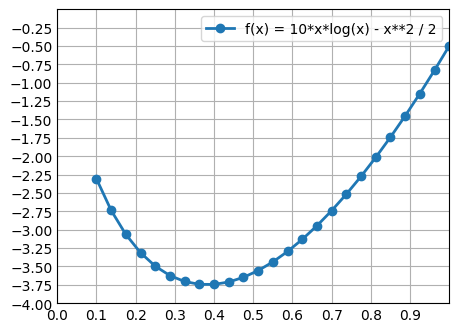

In [97]:
import matplotlib.pyplot as plt
import numpy as np


x_steps = np.linspace(left_bound, right_bound, 25)
y_values = list(map(lambdify(x, research_function), x_steps))

plt.rcParams['figure.figsize'] = [4, 3]
fig, ax = plt.subplots()

line = ax.plot(x_steps, y_values, '-o', linewidth=2.0)
line[0].set_label("f(x) = 10*x*log(x) - x**2 / 2")

ax.set(xlim=(0, 1), xticks=np.arange(0, 1, .1),
       ylim=(-4, 0), yticks=np.arange(-4, 0, .25))

ax.legend()

plt.show()

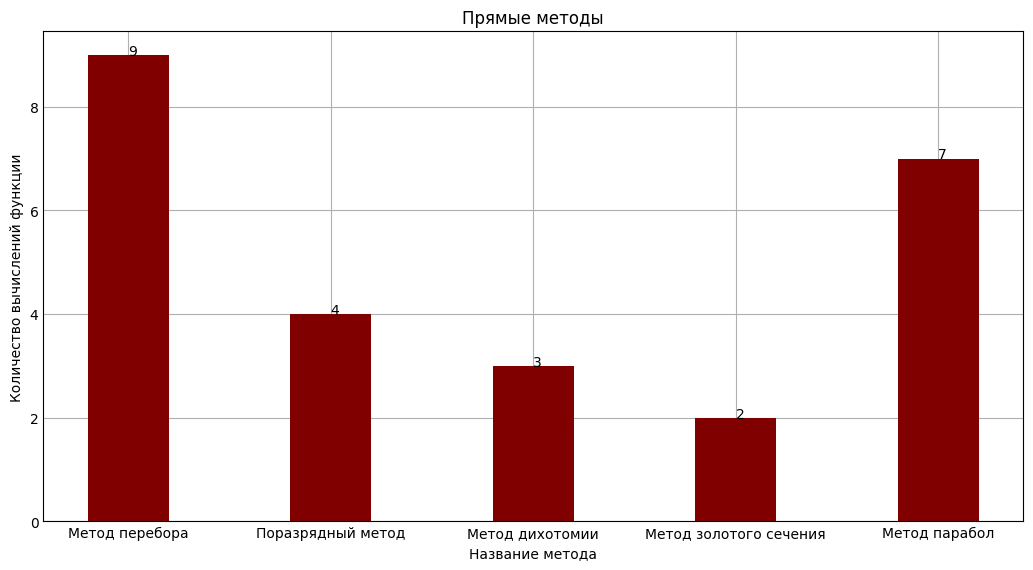

In [118]:
research_eps = 10e-2
 
# creating the dataset
data = {
    "Метод перебора": iterate_method(lambdify(x, research_function), left_bound, right_bound, research_eps)[2],
    "Поразрядный метод": bitByBitSearch(lambdify(x, research_function), left_bound, right_bound, research_eps)[2],
    "Метод дихотомии": dichotomy_minimize(lambdify(x, research_function), left_bound, right_bound, research_eps)[2],
    "Метод золотого сечения": golden_section(lambdify(x, research_function), left_bound, right_bound, research_eps)[2],
    "Метод парабол": parabol_method(lambdify(x, research_function), left_bound, right_bound, research_eps)[2],
}
method_name = list(data.keys())
values = list(data.values())
 
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(method_name, values, color ='maroon', 
        width = 0.4)

for i in range(len(method_name)):
        plt.text(i,values[i],values[i])

plt.xlabel("Название метода")
plt.ylabel("Количество вычислений функции")
plt.title("Прямые методы")
plt.show()


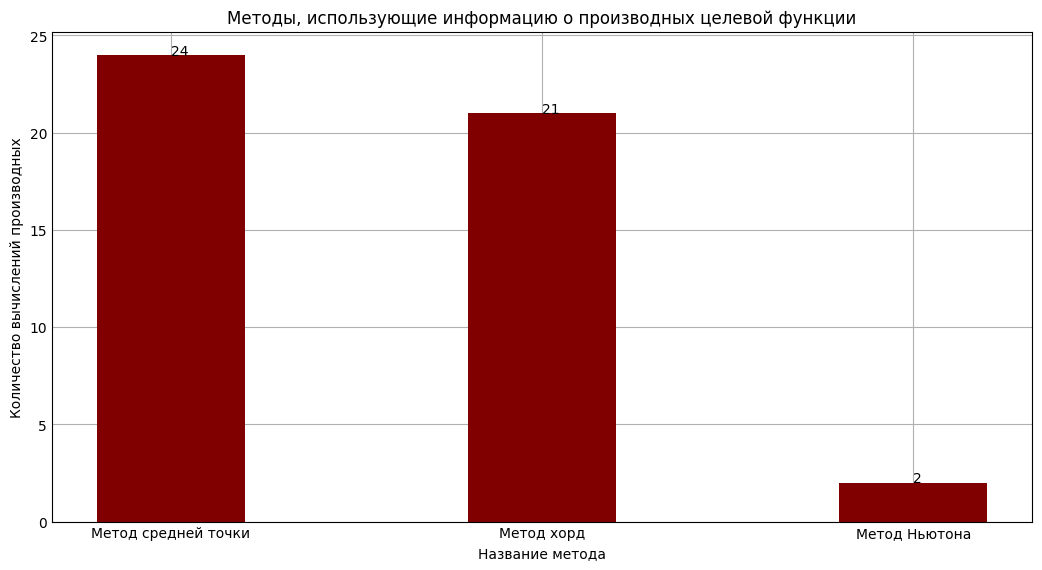

In [123]:
research_eps = 10e-7

# creating the dataset
data = {
    "Метод средней точки": middle_dot(research_function, left_bound, right_bound, research_eps)[2],
    "Метод хорд": chord_method(research_function, left_bound, right_bound, research_eps)[2],
    "Метод Ньютона": newton_method(research_function, left_bound, right_bound, research_eps)[2],
}
method_name = list(data.keys())
values = list(data.values())
 
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(method_name, values, color ='maroon', 
        width = 0.4)

for i in range(len(method_name)):
        plt.text(i,values[i],values[i])

plt.xlabel("Название метода")
plt.ylabel("Количество вычислений производных")
plt.title('Методы, использующие информацию о производных целевой функции')
plt.show()